<a href="https://colab.research.google.com/github/mdegnan200/MiniProject3/blob/main/020722notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Mini Project 3 - Requirements as given by Instructor

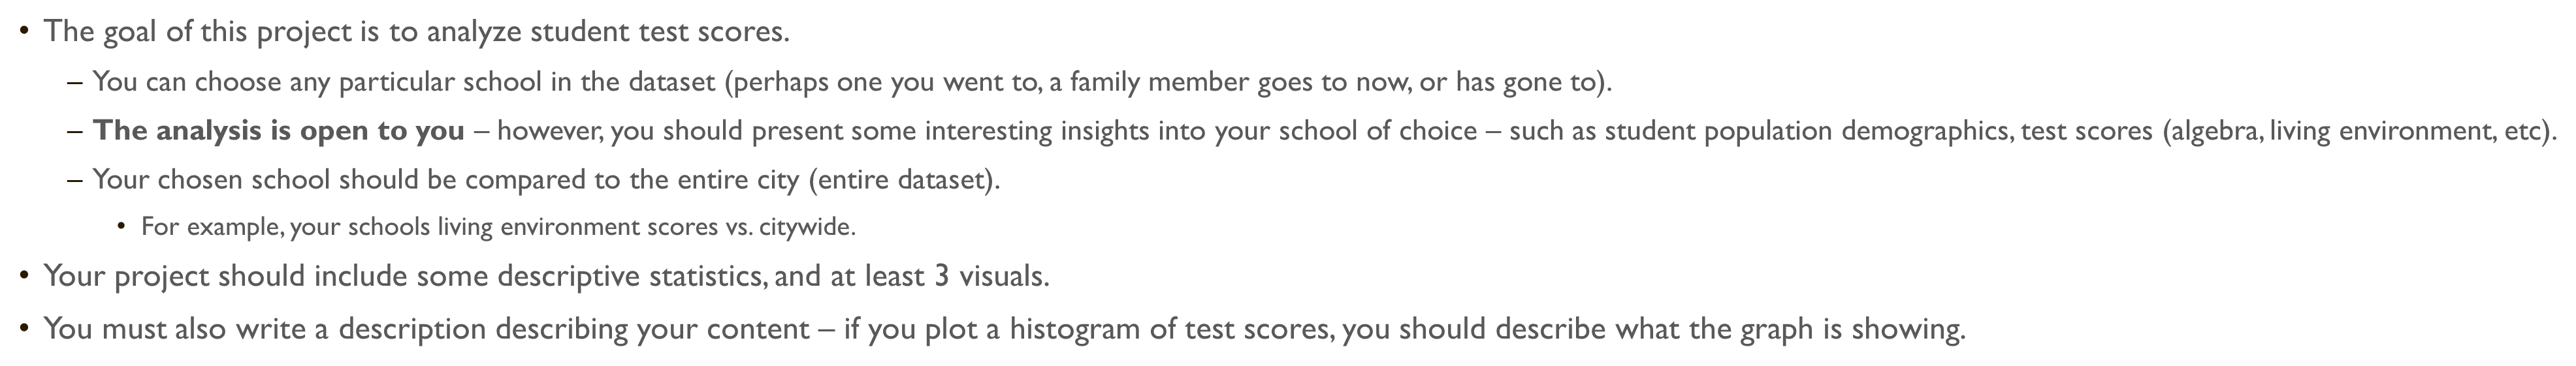


### Mini Project 3 - As Interpreted by Me

1.  Inspect the dataset provided by insructor.
2.  Determine what I want to investigate within this data.
3.  Decided to compare the Common Core Algenbra Rejegents Exam test results from my middle (East Side Middle School) to all the middle schools within the dataset.  
4.  My theory is twofold: 
a.  My school performs better than the group of schools.
b.  Scores have improved from 2015 - 2017
5.  Prove theory through visualizations.  





Import Your Libraries 
Pandas and import your data from a csv (School data).  Don't forget to view a few rows to inspect the type of data we have in our database.  Head (5) to view the first 5 rows.

In [3]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")
df.head(5)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


Lets look at the type of data we have;  How many rows (212331) and how many columns (15).  
Lets review the type of columns.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

Review counts by School Level becuase I know I want to limit this data to analyze.  

In [5]:
df.groupby(['School Level']).count()

,School DBN,School Name,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
School Level,,,,,,,,,,,,,,
Elementary,25,25,25,25,25,25,25,25,25,25,25,25,25,25
High school,151160,151160,151160,151160,151160,151160,151160,151160,151160,151160,151160,151160,151160,151160
Junior High-Intermediate-Middle,15742,15742,15742,15742,15742,15742,15742,15742,15742,15742,15742,15742,15742,15742
K-12 all grades,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294,8294
K-8,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858,6858
Secondary School,30252,30252,30242,30252,30252,30252,30252,30252,30252,30252,30252,30252,30252,30252


I decide I want to limit the number of columns - so I create a new DataFrame (d2) which has only the columns I care about. I am interested in the Mean Score on the Regents Exams as an indicator of how well the school is doing academically in that subject. 

In [6]:
df2 = df[['School DBN','School Name','School Level','Regents Exam','Year','Total Tested','Mean Score']]
df2.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79


I do see that there are more than one row per school, per test, per year.  Not what I expected but need to work with the data given.  I will use all the valid rows expecting that maybe there is a row for each time the test is given to a cohort at that school (class or some group of students).  Will further limit in code below by selecting only some rows and only some columns.  

In [27]:
df2b = df[(df['School Name'] == 'Yorkville East Middle School')]
df2b.head(40)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
390,02M177,Yorkville East Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,24,85.5,0,0,24,100,22,91.7,23,95.8
20162,02M177,Yorkville East Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,23,s,s,s,s,s,s,s,na,na
20163,02M177,Yorkville East Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,1,s,s,s,s,s,s,s,na,na
55216,02M177,Yorkville East Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,23,s,s,s,s,s,s,s,na,na
55217,02M177,Yorkville East Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,1,s,s,s,s,s,s,s,na,na
103628,02M177,Yorkville East Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,10,85.9,0,0,10,100,10,100,10,100
103629,02M177,Yorkville East Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,14,85.3,0,0,14,100,12,85.7,13,92.9
141360,02M177,Yorkville East Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,5,s,s,s,s,s,s,s,na,na
141361,02M177,Yorkville East Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,1,s,s,s,s,s,s,s,na,na
141362,02M177,Yorkville East Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,5,s,s,s,s,s,s,s,na,na


I decide I want to limit my analysis to ONLY Middle Schools.  I do this by only selecting the rows whose School Level is Middle School and put them DataFrame 3.

In [7]:
df3 = df2[(df2['School Level']=='Junior High-Intermediate-Middle')]
df3.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
50,01M301,"Technology, Arts, and Sciences Studio",Junior High-Intermediate-Middle,Common Core Algebra,2016,4,s
51,01M301,"Technology, Arts, and Sciences Studio",Junior High-Intermediate-Middle,Common Core Algebra,2017,1,s
52,01M301,"Technology, Arts, and Sciences Studio",Junior High-Intermediate-Middle,Living Environment,2017,1,s
53,01M332,University Neighborhood Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2017,1,s
54,01M345,"Collaborative Academy of Science, Technology, ...",Junior High-Intermediate-Middle,Common Core Algebra,2016,3,s
55,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Common Core Algebra,2015,6,80.7
56,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Common Core Algebra,2016,7,78
57,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Common Core Algebra,2017,22,72.9
58,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Living Environment,2016,2,s
276,01M839,Tompkins Square Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2015,26,77.4


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15742 entries, 50 to 211655
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School DBN    15742 non-null  object
 1   School Name   15742 non-null  object
 2   School Level  15742 non-null  object
 3   Regents Exam  15742 non-null  object
 4   Year          15742 non-null  int64 
 5   Total Tested  15742 non-null  int64 
 6   Mean Score    15742 non-null  object
dtypes: int64(2), object(5)
memory usage: 983.9+ KB


To further limit my analysis I would like to review only one particular exam for anlaysis and want to eliminate any mean scores of 's' as I can not use that value in my review.  I can see now that I have only 3621 schools/years to evaluate.  

In [9]:
df4 = df3[(df3['Regents Exam'] == 'Common Core Algebra') & (df3['Mean Score'] != 's')]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3621 entries, 55 to 210803
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School DBN    3621 non-null   object
 1   School Name   3621 non-null   object
 2   School Level  3621 non-null   object
 3   Regents Exam  3621 non-null   object
 4   Year          3621 non-null   int64 
 5   Total Tested  3621 non-null   int64 
 6   Mean Score    3621 non-null   object
dtypes: int64(2), object(5)
memory usage: 226.3+ KB


I now would like to convert Mean Score to an Integer as it is the main driver which allows me to compare mastery of the Regents Exam.  

In [10]:
df5 = df4[['School DBN','School Name','School Level','Regents Exam','Year','Total Tested']]
df5['Mean Score'] = pd.to_numeric(df4['Mean Score'])
df5.head(100)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
55,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Common Core Algebra,2015,6,80.7
56,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Common Core Algebra,2016,7,78.0
57,01M378,School for Global Leaders,Junior High-Intermediate-Middle,Common Core Algebra,2017,22,72.9
276,01M839,Tompkins Square Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2015,26,77.4
277,01M839,Tompkins Square Middle School,Junior High-Intermediate-Middle,Common Core Algebra,2016,16,83.8
...,...,...,...,...,...,...,...
4653,08X302,M.S. 302 Luisa Dessus Cruz,Junior High-Intermediate-Middle,Common Core Algebra,2017,57,58.2
4772,08X337,The School for Inquiry and Social Justice,Junior High-Intermediate-Middle,Common Core Algebra,2015,20,76.3
4773,08X337,The School for Inquiry and Social Justice,Junior High-Intermediate-Middle,Common Core Algebra,2016,14,82.8
4774,08X337,The School for Inquiry and Social Justice,Junior High-Intermediate-Middle,Common Core Algebra,2017,30,83.9


Checking to make sure my Mean Score actually converted to Integer.  Looks good to me!

In [11]:
df5.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year            2016.060204
Total Tested      43.947252
Mean Score        76.311848
dtype: float64

Getting a sense for What year did the students perfrom their best (Group by Year) and display the Average of Mean Score.  

In [12]:
df5.groupby(['Year']).mean()

,Total Tested,Mean Score
Year,,
2015,43.876114,71.327807
2016,44.655738,78.652632
2017,43.394030,78.460448


I want to review the Mean Score of the School by Year and By School. 

In [13]:
df5.groupby(['School Name','Year']).mean()

Total Tested  Mean Score
School Name                                    Year                          
Academy For Personal Leadership And Excellence 2015     14.750000   64.075000
                                               2016     16.333333   72.766667
                                               2017     15.333333   74.966667
Academy of Applied Mathematics and Technology  2015     14.571429   66.142857
                                               2016     18.125000   81.012500
...                                                           ...         ...
West Prep Academy                              2017     12.200000   70.420000
Williamsburg Collegiate Charter School         2015     39.222222   65.200000
                                               2016     63.857143   72.285714
                                               2017     19.666667   75.383333
Yorkville East Middle School                   2017     14.250000   85.025000

[571 rows x 2 columns]

I am going to pretend that I went to the very best middle school in the city.  I determine this by doing a max on a datafarme that only has school name, year and Mean Score.  I was afraid that if I did a max on df5, the max of Total Tested would skew my result.  I did remember when doing this that I got the max (or min) of each of the fields discretely.   Meaning that Yorkville East Middle School did not have the highest mean score but it instead was the highest alphabetically within school name.  

I also am going to create a very skinny (only 3 columns) table with the pertient information that I will be presenting visually.  df6 will have only 3 columns: School Name, Year and Mean Score.  

In [21]:
df6 = df5[['School Name','Year','Mean Score']]
df6.max()

School Name    Yorkville East Middle School
Year                                   2017
Mean Score                             94.9
dtype: object

In [35]:
df6.min()

School Name    Academy For Personal Leadership And Excellence
Year                                                     2015
Mean Score                                               42.0
dtype: object

Finding the school with the highest score and will pretend that is my school :)!.  I have determined that East Side Middle School has the highest score - selected the score with the max.   But I also learned that over the 3 years there were many times that the regents exams were given and different (but still good) exam scores were earned. 

In [39]:
df6a = df6[(df6['Mean Score'] == 94.9)]
df6a.head(100)

,School Name,Year,Mean Score
103494,East Side Middle School,2017,94.9


Since I want to compare 'my school', East Side Middle School, to all the middle schools with scores on the Common Core Algebra Regents Exam, I create another dataframe, df7, which only has data for my school.  

In [41]:
df7 = df6[(df6['School Name'] == 'East Side Middle School')]
df7.head(100)

,School Name,Year,Mean Score
321,East Side Middle School,2015,84.0
322,East Side Middle School,2016,91.9
323,East Side Middle School,2017,94.1
20036,East Side Middle School,2015,84.0
103489,East Side Middle School,2015,82.7
103490,East Side Middle School,2015,86.2
103491,East Side Middle School,2016,92.7
103492,East Side Middle School,2016,91.4
103493,East Side Middle School,2017,93.5
103494,East Side Middle School,2017,94.9


I am importing my two visualization tools: Matplotlib and seaborn.  

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Running a quick scatter plot reviewing the Mean Score of the Common Core Algebra Regents Test Exam (selected only Common Core Algebra above with valid values).  Determine that although there are many high scoring schools (over 90), there are also some low scoring schhols (closer to 40).  This is consistent with the Max and Min I did on df6 above.  

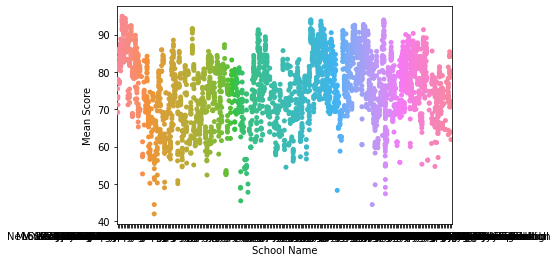

In [19]:
sns.stripplot(x="School Name", y="Mean Score", data=df6)

Looks like my school did much better than the larger group of middle schools.  I can see that for all the times that the exams were taken, scores ranged from 82 - 95.  

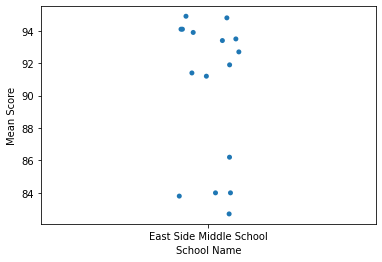

In [42]:
sns.stripplot(x="School Name", y="Mean Score", data=df7)

I can see with the bar chart that the Mean Score of the Common Core Algebra Exam for the Middle Schhols range from mid-40s to 90s.  

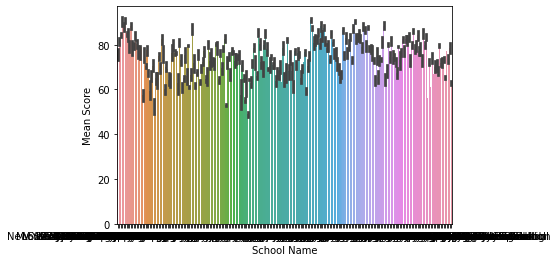

In [43]:
sns.barplot(x="School Name",y="Mean Score",data=df6)

I can see with the bar chart that the Mean Score of the Common Core Algebra Exam for the East Side Middle Schhols is much higher in the 90s.

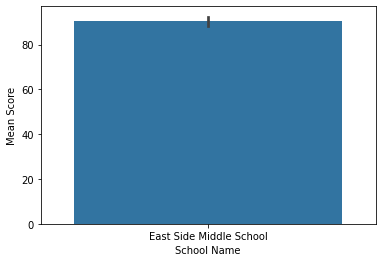

In [44]:
sns.barplot(x="School Name",y="Mean Score",data=df7)

I then decide to do a box plot with a hue of year to understand the impact the year had on the scores.  Because there is so much data, I am not really able to defend my theory that the middle schools are improving their scores on the Common Core Algebra Regents Exam.  

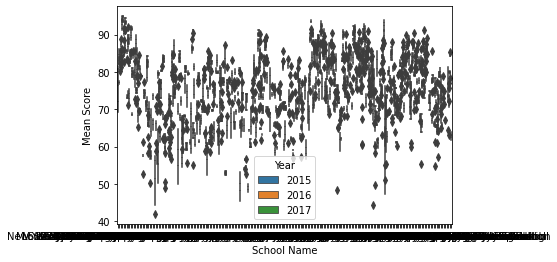

In [51]:
 sns.boxplot(x="School Name",y="Mean Score",hue="Year",data=df6)

When I do a box plot with a hue of year to understand the impact the year had on the scores from 'my school', the impact is much more evident.  I can clearly see that my middle school (East Side Middle School) has been improving its scores on the Common Core Algebra Regents Exam.  You can see that the blue horizontal bar represents 2015, whereas the orqange horizontal bar represents 2016 and finally the green horizontal bar (best scores) represnts 2017.  Way to go East Side Middle School!!!

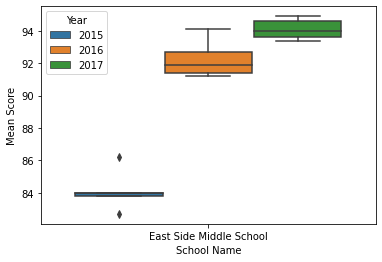

In [52]:
sns.boxplot(x="School Name",y="Mean Score",hue="Year",data=df7)

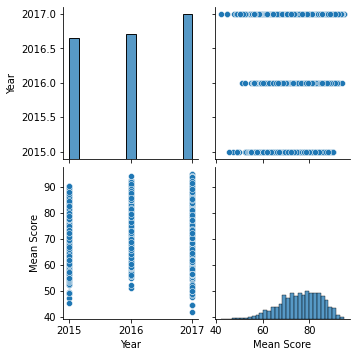

In [45]:
sns.pairplot(df6)

Finally I decide to further investigate using Pairplots.  This set of graphs compares Year and Mean Score (both ways).  You can vaguely see that the scores have improved from 2015 to 2016.  Note Grid on bottom left showing lowest score in the 40s for 2015 but lowest score in 2016 is in the 50s.  It appears that in 2017, the schools have leveled off. This is proven also by the mean of df6 when grouping by year.   

In [54]:
df6.groupby(['Year']).mean()

,Mean Score
Year,
2015,71.327807
2016,78.652632
2017,78.460448


Lastly I can clearly see the improvement in East Side Middle School over the 3 year period.  Note the improvement from 2015 to 2017 in the lower left hand gird (comparing year and score).  This can be further proven with the Mean Score Grouped by Year.  

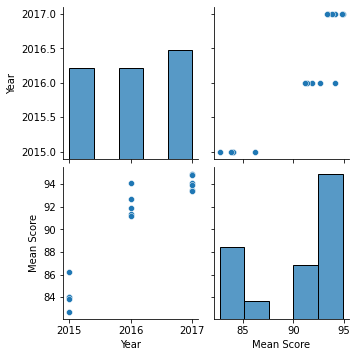

In [48]:
sns.pairplot(df7)

In [55]:
df7.groupby(['Year']).mean()

,Mean Score
Year,
2015,84.14
2016,92.26
2017,94.10
